<a href="https://colab.research.google.com/github/CappyCap17/College_projects/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mini Project using NLP to analyze sentiments from twitter dataset**

In [57]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import re
import nltk
from nltk.corpus import stopwords

In [73]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training (1).csv


In [58]:
df = pd.read_csv('twitter_training.csv')

In [59]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [60]:
column_names = ['Tweet_id', 'Entity', 'Sentiment', 'Tweet_content']

In [61]:
df.columns = column_names

In [62]:
df = df.drop('Sentiment',axis=1)

In [71]:
df

,Tweet_id,Entity,Tweet_content,cleaned_text,sentiment
0,2401,Borderlands,I am coming to the borders and I will kill you...,coming borders kill,negative
1,2401,Borderlands,im getting on borderlands and i will kill you ...,im getting borderlands kill,negative
2,2401,Borderlands,im coming on borderlands and i will murder you...,im coming borderlands murder,negative
3,2401,Borderlands,im getting on borderlands 2 and i will murder ...,im getting borderlands murder,negative
4,2401,Borderlands,im getting into borderlands and i can murder y...,im getting borderlands murder,negative
...,...,...,...,...,...
74676,9200,Nvidia,Just realized that the Windows partition of my...,realized windows partition mac like years behi...,positive
74677,9200,Nvidia,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...,neutral
74678,9200,Nvidia,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...,neutral
74679,9200,Nvidia,Just realized between the windows partition of...,realized windows partition mac like years behi...,positive


In [63]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ''

    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [65]:
df['cleaned_text'] = df['Tweet_content'].apply(preprocess_text)

In [66]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [67]:
analyzer = SentimentIntensityAnalyzer()

In [68]:
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [69]:
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

In [70]:
df

,Tweet_id,Entity,Tweet_content,cleaned_text,sentiment
0,2401,Borderlands,I am coming to the borders and I will kill you...,coming borders kill,negative
1,2401,Borderlands,im getting on borderlands and i will kill you ...,im getting borderlands kill,negative
2,2401,Borderlands,im coming on borderlands and i will murder you...,im coming borderlands murder,negative
3,2401,Borderlands,im getting on borderlands 2 and i will murder ...,im getting borderlands murder,negative
4,2401,Borderlands,im getting into borderlands and i can murder y...,im getting borderlands murder,negative
...,...,...,...,...,...
74676,9200,Nvidia,Just realized that the Windows partition of my...,realized windows partition mac like years behi...,positive
74677,9200,Nvidia,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...,neutral
74678,9200,Nvidia,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...,neutral
74679,9200,Nvidia,Just realized between the windows partition of...,realized windows partition mac like years behi...,positive


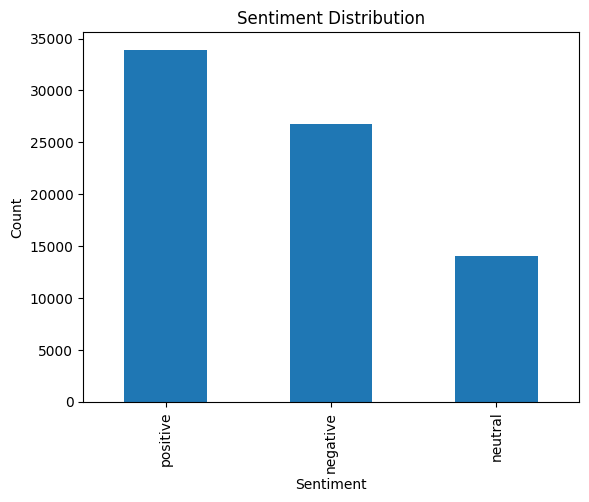

In [72]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()